In [ ]:
pip install Your-Fav-DL-Framework

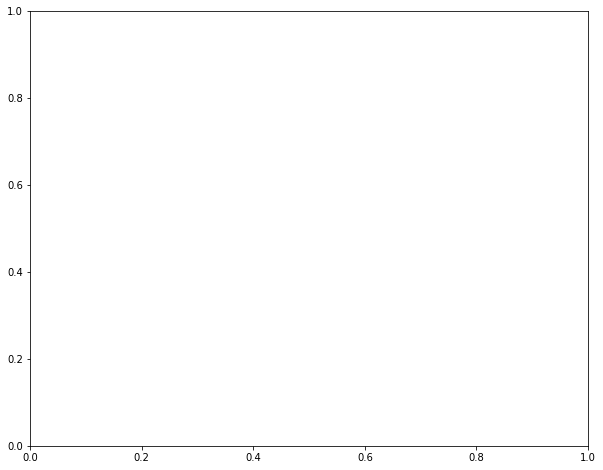

In [ ]:
import Your_Fav_DL_Framework.frame as fw

In [ ]:
# we are only importing minst from keras 
from keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train = x_train.astype('float32')   # change integers to 32-bit floating point numbers
x_test = x_test.astype('float32')

x_train /= 255                        # normalize each value for each pixel for the entire vector for each input
x_test /= 255

In [ ]:
x = fw.flatten(x_train)

In [ ]:
x.shape

(784, 60000)

In [ ]:
y = fw.onehot(y_train)
y.shape

(10, 60000)

In [ ]:
xtt = fw.flatten(x_test)
xtt.shape

(784, 10000)

In [ ]:
ytt = fw.onehot(y_test)
ytt.shape

(10, 10000)

In [ ]:
model =fw.MultiLayer( cost_func=fw.cross_multi_class)

model.addLayerInput(x.shape[0])

model.addHidenLayer(512,act_func=fw.relu)

model.addHidenLayer(512,act_func=fw.relu)


model.addOutputLayer(10,act_func=fw.softmax)

model.initialize_parameters(seed=1)

parm = {}
parm['rho'] = 0.9
parm['rhof'] = 0.99
parm['eps'] = 0.000001

parameters = model.train(x,y,num_iterations=5,print_cost=True , cont=0 ,learning_rate=0.01 ,print_cost_each=1,batch_size=1024 , opt_func=fw.adam_optm, param_dic=parm , reg_term=0,drop=0)

Cost after iteration 0: 0.238658
Cost after iteration 1: 0.086171
Cost after iteration 2: 0.047592
Cost after iteration 3: 0.036069
Cost after iteration 4: 0.029011


In [ ]:
model.test(x,y)

99.63933333333334

In [ ]:
model.test(xtt,ytt)

99.468

In [ ]:
import numpy as np

In [ ]:
ind = 5000
num = 1000

In [ ]:
v1 =np.argmax(model.predict(xtt[:,ind:ind+num]) , axis=0)
v1

array([3, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 6, 1, 1, 9, 8, 9, 2, 3, 5, 5,
       9, 4, 2, 1, 9, 4, 3, 9, 6, 0, 4, 0, 6, 0, 1, 2, 3, 4, 7, 8, 9, 0,
       1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 3, 4, 7, 8,
       6, 3, 4, 0, 9, 7, 1, 9, 3, 8, 4, 7, 3, 0, 9, 1, 4, 5, 4, 6, 2, 0,
       6, 2, 1, 1, 1, 1, 7, 2, 4, 7, 5, 2, 9, 4, 5, 8, 4, 2, 9, 7, 0, 0,
       7, 5, 1, 1, 7, 6, 6, 6, 8, 2, 2, 7, 7, 4, 0, 2, 4, 2, 1, 8, 9, 6,
       1, 0, 5, 9, 6, 9, 8, 0, 3, 0, 8, 3, 9, 6, 3, 0, 1, 2, 3, 4, 5, 6,
       7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 5, 4,
       8, 7, 4, 7, 7, 3, 9, 8, 8, 3, 1, 5, 8, 2, 7, 4, 2, 1, 5, 4, 5, 5,
       8, 6, 4, 4, 4, 1, 8, 7, 5, 5, 1, 8, 9, 1, 3, 6, 3, 3, 2, 2, 6, 9,
       9, 6, 5, 5, 3, 3, 8, 1, 6, 5, 6, 8, 1, 9, 7, 6, 8, 3, 7, 4, 7, 0,
       9, 0, 0, 3, 7, 9, 3, 0, 2, 0, 1, 0, 1, 0, 4, 0, 1, 0, 4, 7, 9, 6,
       2, 6, 2, 2, 9, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8,

In [ ]:
v2 = np.argmax(ytt[:,ind:ind+num] , axis=0)
v2

array([3, 9, 9, 8, 4, 1, 0, 6, 0, 9, 6, 8, 6, 1, 1, 9, 8, 9, 2, 3, 5, 5,
       9, 4, 2, 1, 9, 4, 3, 9, 6, 0, 4, 0, 6, 0, 1, 2, 3, 4, 7, 8, 9, 0,
       1, 2, 3, 4, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8, 3, 4, 7, 8,
       6, 3, 4, 0, 9, 7, 1, 9, 3, 8, 4, 7, 3, 0, 9, 1, 4, 5, 4, 6, 2, 0,
       6, 2, 1, 1, 1, 1, 7, 2, 4, 7, 5, 2, 9, 4, 5, 8, 4, 2, 9, 7, 0, 0,
       7, 5, 1, 1, 7, 6, 6, 6, 8, 2, 2, 7, 7, 4, 0, 2, 4, 2, 1, 8, 9, 6,
       1, 0, 5, 9, 6, 9, 8, 0, 3, 0, 8, 3, 9, 6, 3, 0, 1, 2, 3, 4, 5, 6,
       7, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 5, 4,
       8, 7, 4, 7, 7, 3, 9, 8, 8, 3, 1, 5, 8, 2, 7, 4, 2, 1, 5, 4, 5, 5,
       8, 6, 4, 4, 4, 1, 8, 7, 5, 5, 1, 8, 9, 1, 3, 6, 3, 3, 2, 2, 6, 9,
       9, 6, 5, 5, 3, 3, 8, 1, 6, 5, 6, 8, 1, 9, 7, 6, 8, 3, 7, 4, 7, 0,
       9, 0, 0, 3, 7, 9, 3, 0, 2, 0, 1, 0, 1, 0, 4, 0, 1, 0, 4, 7, 9, 6,
       2, 6, 2, 2, 9, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5,
       6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 8,

In [ ]:
np.sum((v1 == v2)*1)

985